In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import file
df = pd.read_csv('all_df.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

#Drop columns that we don't want to use in prediction
df = df.drop(df.index[358]).reset_index(drop=True)
df = df.drop(['Unnamed: 0', 'Date', 'Revenue', 'Users', 'Sessions', 'Transactions', 'Quantity', 'Bounces', 'Pages / Session',
              'Session Duration', 'Avg. Session Duration Seconds', "('Users', '(Other)')", "('Users', 'Affiliate')","('Users', 'CSE')",
             "('Users', 'Direct')", "('Users', 'Display')", "('Users', 'Email')","('Users', 'Organic Search')", 
             "('Users', 'Organic Social')", "('Users', 'Paid Search')", "('Users', 'Paid Social')", "('Users', 'Partnerships')",
             "('Users', 'Referral')","('Users', 'Social')", "('Revenue', '(Other)')", "('Revenue', 'Affiliate')",
             "('Revenue', 'CSE')", "('Revenue', 'Direct')", "('Revenue', 'Display')", "('Revenue', 'Email')",
             "('Revenue', 'Organic Search')", "('Revenue', 'Organic Social')", "('Revenue', 'Paid Search')",
             "('Revenue', 'Paid Social')", "('Revenue', 'Partnerships')", "('Revenue', 'Referral')","('Revenue', 'Social')",
             "('Transactions', '(Other)')", "('Transactions', 'Affiliate')","('Transactions', 'CSE')", "('Transactions', 'Direct')",
             "('Transactions', 'Display')", "('Transactions', 'Email')","('Transactions', 'Organic Search')",
             "('Transactions', 'Organic Social')", "('Transactions', 'Paid Search')", "('Transactions', 'Paid Social')", 
             "('Transactions', 'Partnerships')", "('Transactions', 'Referral')","('Transactions', 'Social')","('Users', 'desktop')", 
             "('Users', 'mobile')","('Users', 'tablet')", "('Revenue', 'desktop')", "('Revenue', 'mobile')","('Revenue', 'tablet')",
              "('Transactions', 'desktop')", "('Transactions', 'mobile')","('Transactions', 'tablet')", "('Spend', 'Affiliate')",
              "('Spend', 'CSE')","('Spend', 'Display')", "('Spend', 'PLA')", "('Spend', 'Paid Search')", "('Spend', 'Paid Social')",
              "Orders Plan", "Units Plan", "Daily Margin $ Plan", "Daily Net Shipped Revenue Plan", 'Daily Traffic Plan', 'CVR Plan', 
              'AOV Plan', 'EA'], axis=1)

#
df = df.replace([np.inf], np.nan)
df = df.fillna(0)
df.head()

,Revenue Yesterday,Revenue Two Days Ago,Revenue LY,Avg. Sess LY,Daily Revenue Demand Plan,Email Day,SS,MD,GWP,FF,...,SOS,SWP,Sale Day,"('Spend Yesterday', '')","('Spend LY', '')",Rev Goal Reached,Rev Goal Reached Yesterday,Users Goal Reached Yesterday,AOV Goal Reached Yesterday,CVR Goal Reached Yesterday
0,628780.30,525294.24,573167.56,212.0,1830000,1,0,0,0,0,...,0,0,1,110780.03,0.0,0,0.0,0.0,0.0,0.0
1,1221370.25,628780.30,785958.62,203.0,815591,0,0,0,0,0,...,0,0,0,115872.08,0.0,0,0.0,0.0,1.0,0.0
2,704274.10,1221370.25,847696.81,170.0,744743,1,0,0,0,0,...,0,0,0,80428.53,0.0,0,0.0,0.0,1.0,0.0
3,619297.48,704274.10,522765.52,198.0,936497,1,0,0,0,0,...,1,0,1,90747.45,0.0,0,0.0,0.0,0.0,1.0
4,636135.35,619297.48,854602.90,202.0,1115910,1,0,0,1,0,...,0,0,1,129980.97,0.0,0,0.0,0.0,0.0,0.0


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#Create the column to be predicted - original x & y, but didn't work on the MultinomialNB due to the negative spend values.
#y = df['Rev Goal Reached'].values
#X = df.drop('Rev Goal Reached', axis = 1).values

#Create a new dataset with 0 in for spend when spend was < 0
for k, v in df.iteritems():
    v[v < 0] = 0
    

print (df.head())

#Create the column to be predicted
y = df['Rev Goal Reached'].values
X = df.drop('Rev Goal Reached', axis = 1).values

#Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, stratify=y)

#Split the data into training and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, stratify=y)

C:\Users\jrenaud\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


   Revenue Yesterday  Revenue Two Days Ago  Revenue LY  Avg. Sess LY  \
0          628780.30             525294.24   573167.56         212.0   
1         1221370.25             628780.30   785958.62         203.0   
2          704274.10            1221370.25   847696.81         170.0   
3          619297.48             704274.10   522765.52         198.0   
4          636135.35             619297.48   854602.90         202.0   

   Daily Revenue Demand Plan  Email Day  SS  MD  GWP  FF  \
0                    1830000          1   0   0    0   0   
1                     815591          0   0   0    0   0   
2                     744743          1   0   0    0   0   
3                     936497          1   0   0    0   0   
4                    1115910          1   0   0    1   0   

              ...              SOS  SWP  Sale Day  ('Spend Yesterday', '')  \
0             ...                0    0         1                110780.03   
1             ...                0    0         0 

In [4]:
#knn method
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Test set predictions:\n {}".format(y_pred))

print("Accuracy Score:", knn.score(X_test, y_test))

Test set predictions:
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0]
Accuracy Score: 0.73417721519


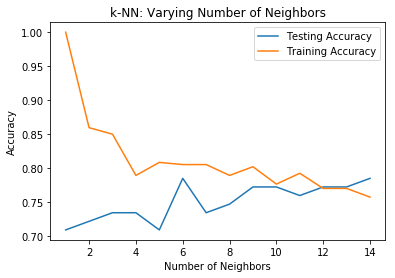

In [5]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [6]:
#knn method with number of neighbors = 13
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

y_pred1 = knn.predict(X_test)

print("Test set predictions:\n {}".format(y_pred1))

print("Accuracy Score Train:", knn.score(X_train, y_train))
print("Accuracy Score Test:", knn.score(X_test, y_test))

Test set predictions:
 [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 1 0]
Accuracy Score Train: 0.769968051118
Accuracy Score Test: 0.772151898734


In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Confusion Matrix
print(confusion_matrix(y_test, y_pred1))

#Classification Report
print(classification_report(y_test, y_pred1))

[[48  6]
 [12 13]]
             precision    recall  f1-score   support

          0       0.80      0.89      0.84        54
          1       0.68      0.52      0.59        25

avg / total       0.76      0.77      0.76        79



In [8]:
#clf
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)
#MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
acc_train = clf.score(X_train, y_train)
acc_test = clf.score(X_test, y_test)

print('Accuracy Score Training Set:', acc_train)
print('Accuracy Score Test Set:', acc_test)


Accuracy Score Training Set: 0.683706070288
Accuracy Score Test Set: 0.721518987342


In [9]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

[[53  1]
 [20  5]]
             precision    recall  f1-score   support

          0       0.73      0.98      0.83        54
          1       0.83      0.20      0.32        25

avg / total       0.76      0.73      0.67        79



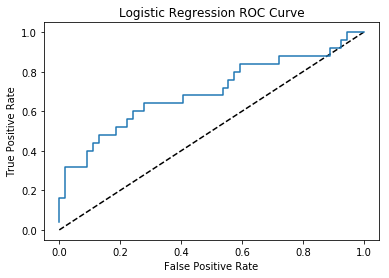

In [10]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label= 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

plt.show();

In [11]:
#Compute AUC score
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_prob)

print ("ROC AUC:", roc_auc)

ROC AUC: 0.697037037037


In [12]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, y, cv=5, scoring ='roc_auc')

print ("AUC scores computed using 5-fold cross-validation: {}".format(cv_scores))

AUC scores computed using 5-fold cross-validation: [ 0.68296296  0.73925926  0.75622642  0.77283019  0.61811321]


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1, 50)}

knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X, y)

print ("Tuned Logistic Regression Parameters: {}".format(knn_cv.best_params_))
print ("Best score is {}".format(knn_cv.best_score_))

Tuned Logistic Regression Parameters: {'n_neighbors': 12}
Best score is 0.75


In [14]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 7}
Best score is 0.7346938775510204


LR: 0.726923 (0.154128)
LDA: 0.767628 (0.112630)
KNN: 0.706282 (0.136465)
CART: 0.632179 (0.124528)
NB: 0.662949 (0.172339)


C:\Users\jrenaud\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jrenaud\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jrenaud\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jrenaud\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jrenaud\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jrenaud\AppData\Local\Continuum\anaconda3\lib\

SVM: 0.680705 (0.161648)


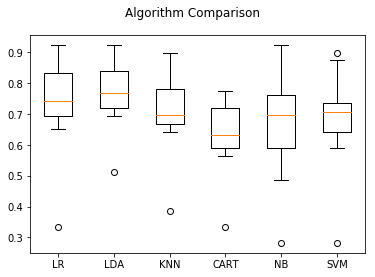

In [15]:
#Compare each of the algorithms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection

# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [16]:
df.corr()

,Revenue Yesterday,Revenue Two Days Ago,Revenue LY,Avg. Sess LY,Daily Revenue Demand Plan,Email Day,SS,MD,GWP,FF,...,SOS,SWP,Sale Day,"('Spend Yesterday', '')","('Spend LY', '')",Rev Goal Reached,Rev Goal Reached Yesterday,Users Goal Reached Yesterday,AOV Goal Reached Yesterday,CVR Goal Reached Yesterday
Revenue Yesterday,1.000000,0.640084,0.422084,0.308235,0.520325,-0.105511,0.060199,-0.085499,-0.050457,0.087318,...,0.199873,0.068198,0.168918,0.665096,0.382240,0.207170,0.267767,0.142557,-0.081938,0.135531
Revenue Two Days Ago,0.640084,1.000000,0.275198,0.190581,0.377660,-0.021322,0.103656,-0.043985,0.010588,0.085798,...,0.154846,0.030250,0.134036,0.558946,0.386958,0.061809,0.212877,0.109726,-0.103275,0.079234
Revenue LY,0.422084,0.275198,1.000000,0.627523,0.559484,-0.004314,-0.094323,-0.081132,-0.073058,-0.061084,...,0.140231,0.216687,0.093125,0.328017,0.468855,-0.040779,-0.047041,0.066207,-0.027270,-0.081806
Avg. Sess LY,0.308235,0.190581,0.627523,1.000000,0.485387,-0.108961,-0.036163,-0.007337,-0.069546,-0.076901,...,0.304808,0.193977,0.234730,0.205999,0.242552,-0.037430,-0.039183,0.048807,0.020030,-0.125149
Daily Revenue Demand Plan,0.520325,0.377660,0.559484,0.485387,1.000000,0.008195,0.020050,-0.108537,-0.069632,0.217271,...,0.313216,0.134903,0.326503,0.468401,0.281172,-0.107075,-0.101911,-0.049954,-0.124302,-0.067130
Email Day,-0.105511,-0.021322,-0.004314,-0.108961,0.008195,1.000000,-0.005547,0.083215,0.117265,-0.013303,...,0.126975,0.097630,0.206460,0.049596,-0.150652,0.058157,0.012078,0.021532,-0.003460,0.067022
SS,0.060199,0.103656,-0.094323,-0.036163,0.020050,-0.005547,1.000000,-0.049862,-0.049862,-0.035029,...,-0.187615,-0.054764,0.300412,0.085258,-0.065649,0.080872,0.061423,0.064275,-0.014280,-0.043988
MD,-0.085499,-0.043985,-0.081132,-0.007337,-0.108537,0.083215,-0.049862,1.000000,-0.026178,-0.018391,...,-0.098500,-0.028752,0.157720,-0.059362,-0.074301,0.028163,0.097598,0.043602,0.108913,0.057805
GWP,-0.050457,0.010588,-0.073058,-0.069546,-0.069632,0.117265,-0.049862,-0.026178,1.000000,-0.018391,...,-0.098500,-0.028752,0.157720,0.065465,-0.018007,-0.075988,-0.041271,0.010088,0.011586,-0.007685
FF,0.087318,0.085798,-0.061084,-0.076901,0.217271,-0.013303,-0.035029,-0.018391,-0.018391,1.000000,...,-0.069199,-0.020199,0.110802,0.071239,0.040093,-0.028994,0.019785,0.054176,-0.105817,-0.051407


In [17]:
df.cov()

,Revenue Yesterday,Revenue Two Days Ago,Revenue LY,Avg. Sess LY,Daily Revenue Demand Plan,Email Day,SS,MD,GWP,FF,...,SOS,SWP,Sale Day,"('Spend Yesterday', '')","('Spend LY', '')",Rev Goal Reached,Rev Goal Reached Yesterday,Users Goal Reached Yesterday,AOV Goal Reached Yesterday,CVR Goal Reached Yesterday
Revenue Yesterday,1.636759e+11,1.060938e+11,6.240272e+10,3.896952e+06,7.887203e+10,-20309.220987,6863.222887,-5460.766008,-3222.658770,3969.231932,...,35962.685940,4759.026903,34202.053952,1.063645e+10,6.213619e+09,39110.997993,50550.923517,27879.264186,-16553.509865,27127.373958
Revenue Two Days Ago,1.060938e+11,1.678498e+11,4.120203e+10,2.440011e+06,5.797193e+10,-4156.180871,11967.476901,-2844.893690,684.822499,3949.544907,...,28214.049082,2137.650206,27482.983053,9.052128e+09,6.370015e+09,11816.543615,40697.484766,21730.562373,-21128.479818,16060.032158
Revenue LY,6.240272e+10,4.120203e+10,1.335439e+11,7.166263e+06,7.660470e+10,-750.009849,-9713.572877,-4680.626325,-4214.819957,-2508.120554,...,22790.936469,13658.252338,17031.816914,4.738371e+09,6.884408e+09,-6953.859887,-8021.791422,11695.414163,-4976.351564,-14790.167315
Avg. Sess LY,3.896952e+06,2.440011e+06,7.166263e+06,9.765675e+02,5.683223e+06,-1.620035,-0.318467,-0.036197,-0.343102,-0.270017,...,4.236260,1.045566,3.671160,2.544695e+05,3.045588e+05,-0.545814,-0.571389,0.737291,0.312569,-1.934887
Daily Revenue Demand Plan,7.887203e+10,5.797193e+10,7.660470e+10,5.683223e+06,1.403820e+11,1460.779086,2116.947179,-6420.007412,-4118.767002,9146.744376,...,52192.110183,8718.238165,61224.700898,6.937347e+09,4.232958e+09,-18720.810037,-17817.912339,-9047.489822,-23256.754841,-12443.729683
Email Day,-2.030922e+04,-4.156181e+03,-7.500098e+02,-1.620035e+00,1.460779e+03,0.226362,-0.000744,0.006250,0.008808,-0.000711,...,0.026867,0.008012,0.049161,9.327532e+02,-2.880010e+03,0.012912,0.002682,0.004952,-0.000822,0.015776
SS,6.863223e+03,1.196748e+04,-9.713573e+03,-3.184665e-01,2.116947e+03,-0.000744,0.079414,-0.002218,-0.002218,-0.001109,...,-0.023514,-0.002662,0.042369,9.497422e+02,-7.433498e+02,0.010635,0.008077,0.008756,-0.002009,-0.006133
MD,-5.460766e+03,-2.844894e+03,-4.680626e+03,-3.619709e-02,-6.420007e+03,0.006250,-0.002218,0.024923,-0.000652,-0.000326,...,-0.006916,-0.000783,0.012462,-3.704506e+02,-4.713177e+02,0.002075,0.007190,0.003327,0.008586,0.004515
GWP,-3.222659e+03,6.848225e+02,-4.214820e+03,-3.431025e-01,-4.118767e+03,0.008808,-0.002218,-0.000652,0.024923,-0.000326,...,-0.006916,-0.000783,0.012462,4.085355e+02,-1.142221e+02,-0.005598,-0.003040,0.000770,0.000913,-0.000600
FF,3.969232e+03,3.949545e+03,-2.508121e+03,-2.700167e-01,9.146744e+03,-0.000711,-0.001109,-0.000326,-0.000326,0.012625,...,-0.003458,-0.000391,0.006231,3.164059e+02,1.810080e+02,-0.001520,0.001037,0.002942,-0.005937,-0.002858


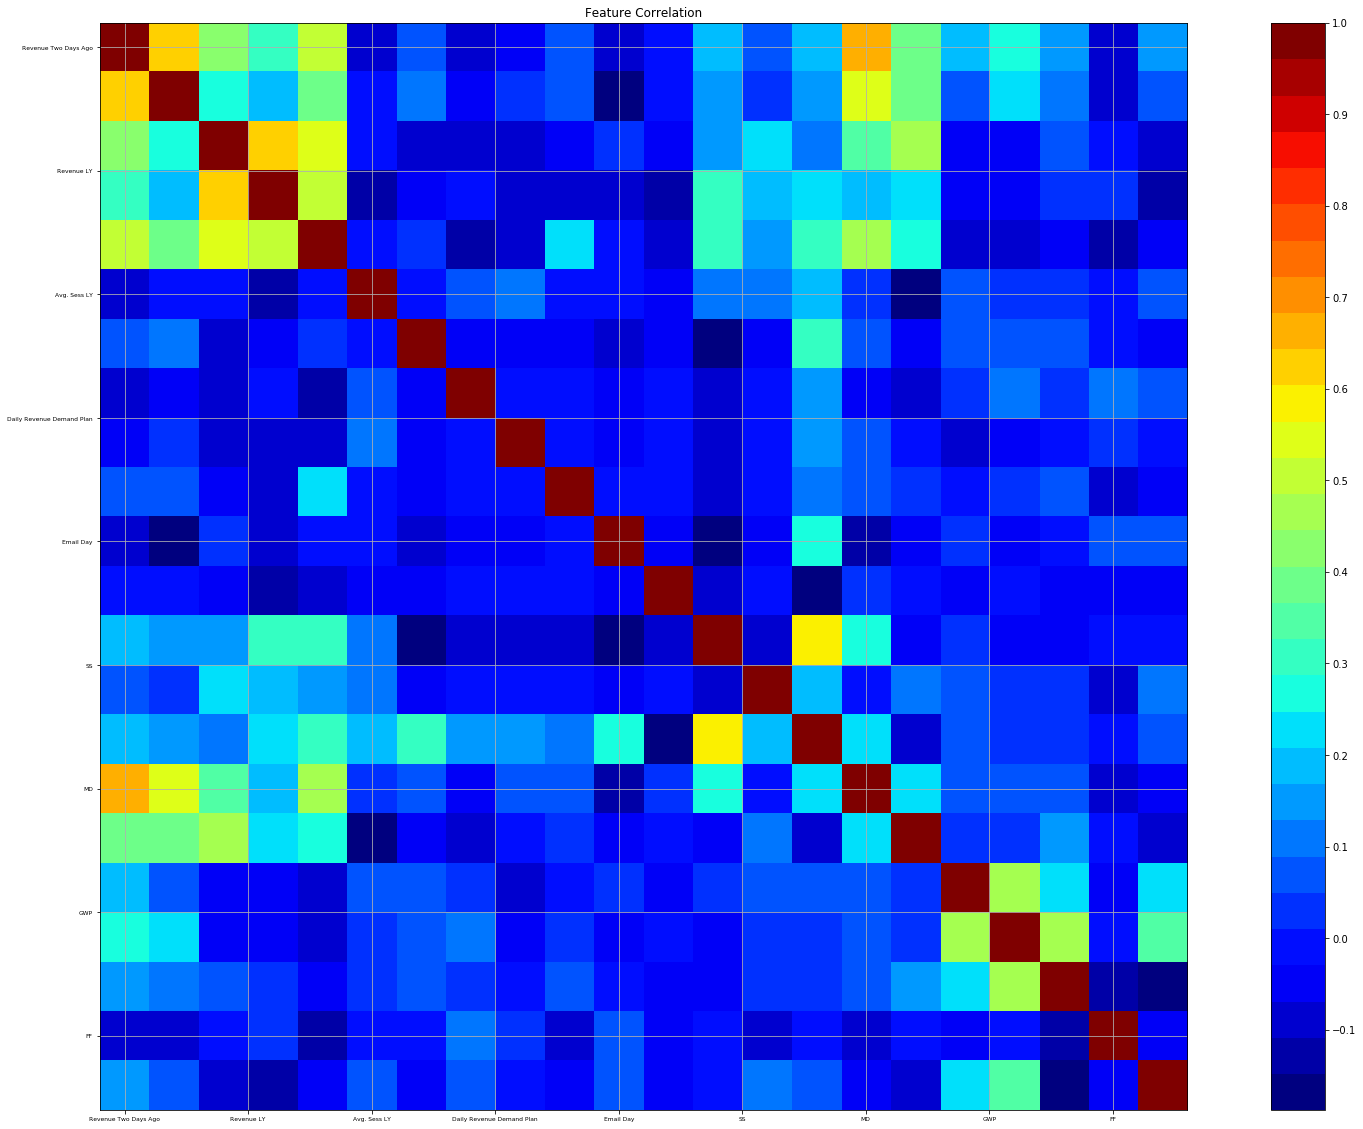

In [18]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(30,20))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels= df.columns
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-.5,-.4, -.3, -.2, -.1, 0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
    plt.show()

correlation_matrix(df)

In [20]:
corr = df.corr()

indices = np.where(corr > .65)
indices = [(df.columns[x], df.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
print(indices)

[('Revenue Yesterday', "('Spend Yesterday', '')")]
